In [1]:
from matplotlib import pyplot as plt
import logomaker as lm
import os, math
import numpy as np
from enum import Enum

In [2]:
class Y_AXIS_UNIT(Enum):
    COUNTS = 1
    BITS = 2

def generate_logos(
    seqs,
    save_loc_and_name, 
    displaysavefilename_astitle, 
    y_axis_units=Y_AXIS_UNIT.BITS
):
    
    fig, axs = plt.subplots(1,1,figsize=(2.5,0.8)) ## Change Weblogo size
    if displaysavefilename_astitle == True:
        title_wl = os.path.splitext(os.path.basename(save_loc_and_name))[0]
        axs.set_title(title_wl, size=8)
    axs.set_xticks([])
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    if y_axis_units == Y_AXIS_UNIT.BITS:
        if len(seqs) < 15: pseudocnt = 0.1
        else: pseudocnt = 0.2
        counts_mat = lm.alignment_to_matrix(seqs, to_type='information',characters_to_ignore='-',pseudocount=pseudocnt)
        the_y_max = math.ceil(counts_mat.sum(axis=1).to_numpy().max())
        if the_y_max > 4.0: the_y_max = 4.0
        logo = lm.Logo(counts_mat, ax=axs, color_scheme="hydrophobicity")
        axs.set_ylim([0,the_y_max])
        plt.yticks([0,the_y_max], fontsize = 10) 
        plt.ylabel('Bits', size = 10, labelpad=-10)
        # plt.xlabel("Alignment Position")
        plt.savefig(save_loc_and_name,dpi=300,bbox_inches='tight')
        plt.show()
    elif y_axis_units == Y_AXIS_UNIT.COUNTS:
        if len(seqs) < 15: pseudocnt = 0.1
        else: pseudocnt = 0.2
        counts_mat = lm.alignment_to_matrix(seqs, to_type='counts',characters_to_ignore='-',pseudocount=pseudocnt)
        the_y_max = math.ceil(counts_mat.sum(axis=1).to_numpy().max())
        logo = lm.Logo(counts_mat, ax=axs, color_scheme="hydrophobicity")
        axs.set_ylim([0,the_y_max])
        plt.yticks([0,the_y_max], fontsize = 10) 
        plt.ylabel('Residue Counts', size = 10, labelpad=-10)
        # plt.xlabel("Alignment Position")
        plt.savefig(save_loc_and_name,dpi=300,bbox_inches='tight')
        plt.show()

In [3]:
example_sequences = [
'VWRDAEDYATFPK',
'TPDWDGPDYAAHK',
'EMDAPDYASWEPK',
'SVEDDAPDYADFK',
'MMDMDLQDYAGLK',
'YEQMHDVEDYSQK',
'EFDKHDYAAYPRK',
'PMFWDVPDYSGMK',
'WKFRDDKMDYADK',
'VDDLRYASSNQLK',
'VGQMWDMPDYAGK',
'ALFDLEDYAKLNK',
'PDNRLDLKDYAFK',
'WEWSTDPRDYSQK',
'VKWNDVMDYADPK',
'MQYLPDLMDYDSK']

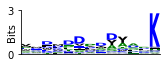

In [5]:
generate_logos(example_sequences, 'Example Logo Plot.png', 
               displaysavefilename_astitle = False, y_axis_units = Y_AXIS_UNIT.BITS)